# Abdelrahman Issawi

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering
Sources:

- CSV
- programmatic download from website
- Twitter API's JSON data

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1939,860563773140209665,https://pbs.twimg.com/media/C_FWL0vVwAA13N7.jpg,1,Cardigan,0.583936,True,Pembroke,0.055979,True,beagle,0.045896,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True
628,680889648562991104,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,1,Shetland_sheepdog,0.876337,True,collie,0.078331,True,Pomeranian,0.020407,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1754,824775126675836928,https://pbs.twimg.com/media/C3Iwlr0WYAARVh4.jpg,1,Border_terrier,0.610499,True,malinois,0.090291,True,Airedale,0.068625,True


In [4]:
key = ""
key_secret = ""
token = ""
token_secret = ""

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [23]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

,tweet_id,retweets,favorites
1281,708400866336894977,11262,17415
1161,722613351520608256,1822,5364
1427,697482927769255936,762,2648
1832,676089483918516224,476,1422
1103,734559631394082816,450,1636


# Assessment
Three dataframes:

- tweets_df which has retweet and favorite counts
- img_predictions_df has the results of a neural network trying to identify dog breed in a tweet's picture
- archve_df has the tweet's text, rating, and dog category

In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2351 non-null   object
 1   retweets   2351 non-null   int64 
 2   favorites  2351 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [25]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
tweets_df.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


In [30]:
all_columns = pd.Series(list(tweets_df) + list(archive_df) + list(img_predictions_df))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [31]:
archive_df.name.value_counts().head(5)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [32]:
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:

archive_df[archive_df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


## Issues
#### Completeness

- missing retweet and favorite data for 5 tweets (tweets_df)
- missing img predictions for some tweets (img_predictions_df)
The missing retweet and favorite data is unrecoverable. There is no status data available from the Twitter API and not all tweets have an image. I did not confirm that all tweets with an image stored the image.

### Tidiness

- retweets and favorites in their own table (tweets_df)
- dog stages in multiple columns (archive_df)
- three separate tables

### Validity

archive

- tweet_id is int
- timestamp is str
- in_reply_to_status_id is float
- in_reply_to_user_id is float
- retweeted_status_id is float
- retweeted_status_user_id is float
- retweeted_status_timestamp is str
- dog stages are str
- text is cut off with ellipses
- incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)

img predictions

-tweet_id is int in img_predictions_df

tweets

- retweets and favorites are float

### Accuracy

- None

### Consistency

- meaningful but inconsistent numerators and denominators (archive_df)

# Cleaning
### Tidiness
Define: retweets and favorites in their own table (tweets_df)

Code: Convert tweet_id in archive_df to string. Inner join tweets_df, archive_df, and img_predictions on tweet_id.

In [34]:
archive_clean = archive_df.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [35]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

Test

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         78 non-null     float64
 7   retweeted_status_user_id    78 non-null     float64
 8   retweeted_status_timestamp  78 non-null     object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2072 non-null   int64  
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  doggo                       2072 

In [38]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
84,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,...,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
1328,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,...,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
43,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,...,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False


In [39]:
archive_clean[archive_clean.retweets.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Define: dog categories hide category variable (archive_df)

Code: Melt dog stage columns into single column.

In [40]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean = archive_clean.drop('variable', axis=1)

Test

In [41]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
4627,798340744599797760,NaN,NaN,2016-11-15 01:44:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,...,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True,None
5914,671497587707535361,NaN,NaN,2015-12-01 01:14:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671497587...,...,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False,None
4392,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,...,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,None


In [42]:
len(archive_clean[archive_clean.dog_stage != 'None'])

334

In [43]:
archive_clean.dog_stage.value_counts()

None       7954
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8288 non-null   object 
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8288 non-null   object 
 4   source                      8288 non-null   object 
 5   text                        8288 non-null   object 
 6   retweeted_status_id         312 non-null    float64
 7   retweeted_status_user_id    312 non-null    float64
 8   retweeted_status_timestamp  312 non-null    object 
 9   expanded_urls               8288 non-null   object 
 10  rating_numerator            8288 non-null   int64  
 11  rating_denominator          8288 non-null   int64  
 12  name                        8288 non-null   object 
 13  retweets                    8288 

In [45]:
# Keep one of 3 duplicates with 'None'
dup_df1 = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_df1 = archive_clean.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean.duplicated(subset='tweet_id', keep = False)
dup_df2 = archive_clean[dup_pos]
dup_df2 = dup_df2[dup_df2.dog_stage != 'None']

# Combine
dup_df1 = dup_df1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_df2)

In [46]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2085 non-null   object 
 1   in_reply_to_status_id       24 non-null     float64
 2   in_reply_to_user_id         24 non-null     float64
 3   timestamp                   2085 non-null   object 
 4   source                      2085 non-null   object 
 5   text                        2085 non-null   object 
 6   retweeted_status_id         80 non-null     float64
 7   retweeted_status_user_id    80 non-null     float64
 8   retweeted_status_timestamp  80 non-null     object 
 9   expanded_urls               2085 non-null   object 
 10  rating_numerator            2085 non-null   int64  
 11  rating_denominator          2085 non-null   int64  
 12  name                        2085 non-null   object 
 13  retweets                    2085 

In [47]:
remaining_dup_df = dup_df_merged[dup_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_dup_df[remaining_dup_df.tweet_id == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4509,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


Define: Duplicate tweets from multiple dog stages.

Code: Multiple stages appear in 14 tweets. Change dog_stage to multiple, drop duplicates. Remove drop duplicates from archive_clean based on tweet_id, then append multiple rows.

In [48]:
remaining_dup_df.dog_stage = 'multiple'
dup_drops = remaining_dup_df.drop_duplicates()
dup_drops[dup_drops.tweet_id == '817777686764523521']

C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,multiple


In [49]:

duped_ids = set(remaining_dup_df.tweet_id)
for idx in dup_df_merged.tweet_id:
    if idx in duped_ids:
        dup_df_merged.dog_stage[dup_df_merged.tweet_id == idx] = 'multiple'
archive_clean = dup_df_merged.drop_duplicates()

C:\Users\Aid-i\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Test

In [50]:
archive_clean.dog_stage.value_counts()

None        1751
pupper       211
doggo         67
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         78 non-null     float64
 7   retweeted_status_user_id    78 non-null     float64
 8   retweeted_status_timestamp  78 non-null     object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2072 non-null   int64  
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  retweets                    2072 

## Validity
Define: Convert float variables (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to object.

Code: Convert tweet_id to string

In [52]:
#validity 
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Test

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   object 
 1   in_reply_to_status_id       2072 non-null   object 
 2   in_reply_to_user_id         2072 non-null   object 
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         2072 non-null   object 
 7   retweeted_status_user_id    2072 non-null   object 
 8   retweeted_status_timestamp  78 non-null     object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2072 non-null   int64  
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  retweets                    2072 

Define: Convert object variables (timestamp and retweeted_status_timestamp) to datetime.

Code: Convert timestamp to datetime object.

In [54]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  78 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

Define: dog categories are str (archive_df)

Code: convert dog_stage to categorical type

In [56]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

Test


In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  78 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

Define: retweets and favorites are float

Code: Fill NaNs with median values.

In [58]:
median_retweet = np.median(archive_clean.retweets.dropna())
median_favorite = np.median(archive_clean.favorites.dropna())
print(median_retweet, median_favorite)

1397.0 3845.0


In [59]:
archive_clean.retweets = archive_clean.retweets.fillna(median_retweet).astype('int')
archive_clean.favorites = archive_clean.favorites.fillna(median_favorite).astype('int')


Test

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  78 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

Define: names incorrectly identified from available text

Code: replace words with names where available

In [61]:
archive_clean.text[archive_clean.name =='a']
archive_clean.text[archive_clean.name =='an']
archive_clean.text[archive_clean.name =='my']
archive_clean.text[archive_clean.name =='his']

813    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [62]:
archive_clean.name[2204] = 'Berta'
archive_clean.name[2034] = 'Jacob'
archive_clean.name[2066] = 'Rufus'
archive_clean.name[2116] = 'Spork'
archive_clean.name[2125] = 'Cherokee'
archive_clean.name[2161] = 'Alfredo'
archive_clean.name[2218] = 'Chuk'
archive_clean.name[2235] = 'Alfonso'
archive_clean.name[2249] = 'Cheryl'
archive_clean.name[2255] = 'Jessiga'
archive_clean.name[2264] = 'Klint'
archive_clean.name[2273] = 'Kohl'
archive_clean.name[2304] = 'Pepe'
archive_clean.name[2311] = 'Octaviath'
archive_clean.name[archive_clean.name == 'my'] = 'Zoey'
archive_clean.name[archive_clean.name == 'his'] = 'Quizno'

C:\Users\Aid-i\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Aid-i\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Test

In [63]:
archive_clean.loc[archive_clean.name == 'Berta']
archive_clean.loc[archive_clean.name == 'Jacob']
archive_clean.loc[archive_clean.name == 'Rufus']
archive_clean.loc[archive_clean.name == 'Spork']
archive_clean.loc[archive_clean.name == 'Cherokee']
archive_clean.loc[archive_clean.name == 'Alfredo']
archive_clean.loc[archive_clean.name == 'Chuk']
archive_clean.loc[archive_clean.name == 'Alfonso']
archive_clean.loc[archive_clean.name == 'Cheryl']
archive_clean.loc[archive_clean.name == 'Jessiga']
archive_clean.loc[archive_clean.name == 'Klint']
archive_clean.loc[archive_clean.name == 'Kohl']
archive_clean.loc[archive_clean.name == 'Pepe']
archive_clean.loc[archive_clean.name == 'Octaviath']
archive_clean.loc[archive_clean.name == 'Zoey']
archive_clean.loc[archive_clean.name == 'Quizno']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
813,748692773788876800,nan,nan,2016-07-01 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,nan,nan,NaT,https://twitter.com/dog_rates/status/748692773...,...,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False,doggo



I noticed that the text for each tweet is incomplete. I am not correcting this at this time.

Define: incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such) (archive_df)

Code: Replace "a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such" with "None".

In [64]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in archive_clean.name:
    if name in non_names:
        archive_clean.name[archive_clean.name == name] = 'None'

C:\Users\Aid-i\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)



Test

In [65]:
archive_clean.name.value_counts()[:10]

None       669
Charlie     11
Penny       10
Cooper      10
Tucker      10
Oliver      10
Lucy        10
Winston      8
Lola         8
Bo           8
Name: name, dtype: int64

Define: meaningful but inconsistent numerators and denominators (archive_df)

In [66]:
archive_clean.rating_denominator.value_counts()

10     2054
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

# Store

In [67]:

archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [76]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
40,This is Bella. She hopes her smile made you sm...,5
556,"This is Logan, the Chow who lived. He solemnly...",75
1450,Here we have uncovered an entire battalion of ...,26
4756,This is Sophie. She's a Jubilant Bush Pupper. ...,27


# Analysis
What does the relationship between retweets and favorites look like? 5 tweets had missing values for retweets and favorites, so I filled those in with median values for their respective variables.

C:\Users\Aid-i\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


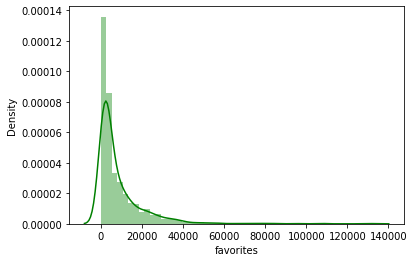

In [69]:
sns.distplot(archive_clean.favorites, color = 'green', label = 'Favorites')

plt.show()

C:\Users\Aid-i\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


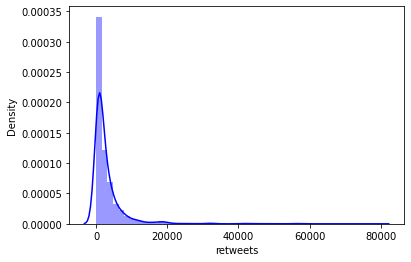

In [70]:
sns.distplot(archive_clean.retweets, color = 'blue', label = 'Retweets')
plt.show()


Trying to log transform the favorites and retweets variables so I can get a normal distribution. I'm adding some artificial jitter by setting the zero values to ones.

C:\Users\Aid-i\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aid-i\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Aid-i\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Use

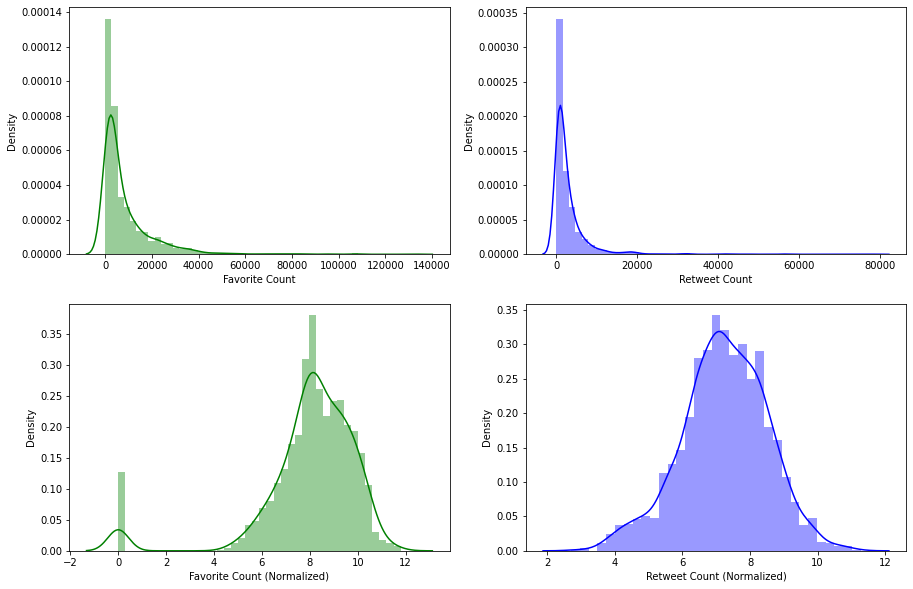

In [71]:
favorities_lognormed = archive_clean.favorites[archive_clean.favorites <= 0] = 1
retweets_lognormed = archive_clean.retweets[archive_clean.retweets <= 0] = 1

f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(archive_clean.favorites, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(archive_clean.retweets, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(archive_clean.retweets.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

plt.show()
f.savefig('distplots.png')

The original distributions for both favorites and retweets have long positive tails. Extremely popular tweets are extremely rare. The normalized graphs (the bottom two) again show similar distributions. They are roughly normal except for the spike in values for the normalized favorite count. That may be due to my jitter work and not an actual attribute of the data. Or there are actually a bunch of tweets with one favorite count.

The two variables seem to have similar distributions implying that the two measurements are representing similar phenomona.

In [72]:
archive_clean.retweets.describe()

count     2072.000000
mean      2954.323359
std       5023.939243
min         15.000000
25%        629.500000
50%       1397.000000
75%       3412.750000
max      79007.000000
Name: retweets, dtype: float64

In [73]:
archive_clean.favorites.describe()

count      2072.000000
mean       8581.796332
std       12276.467375
min           1.000000
25%        1664.750000
50%        3845.000000
75%       10900.750000
max      132170.000000
Name: favorites, dtype: float64

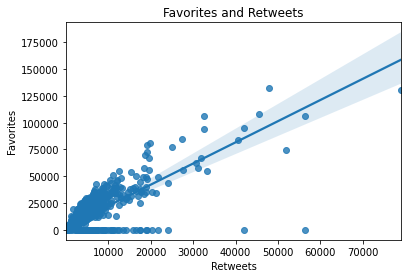

In [74]:
g = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [75]:
archive_clean.corr()

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.198243,0.017732,0.017004,-0.000413,-0.009139,-0.028503,-0.020319,-0.033727,-0.003883,-0.028490
rating_denominator,0.198243,1.000000,-0.022023,-0.026125,-0.004019,-0.004315,0.001000,-0.034415,-0.000498,0.006795,0.005093
retweets,0.017732,-0.022023,1.000000,0.807229,0.103595,0.045409,0.009853,-0.009730,0.023464,-0.032916,0.003039
favorites,0.017004,-0.026125,0.807229,1.000000,0.133685,0.071968,0.052865,-0.020363,0.059625,-0.050239,0.042533
img_num,-0.000413,-0.004019,0.103595,0.133685,1.000000,0.203967,0.027623,-0.160172,0.047263,-0.139320,0.059533
p1_conf,-0.009139,-0.004315,0.045409,0.071968,0.203967,1.000000,0.118523,-0.510987,0.131717,-0.709681,0.109616
p1_dog,-0.028503,0.001000,0.009853,0.052865,0.027623,0.118523,1.000000,0.113482,0.634600,0.048815,0.557212
p2_conf,-0.020319,-0.034415,-0.009730,-0.020363,-0.160172,-0.510987,0.113482,1.000000,0.101829,0.479124,0.067830
p2_dog,-0.033727,-0.000498,0.023464,0.059625,0.047263,0.131717,0.634600,0.101829,1.000000,0.042871,0.551653
p3_conf,-0.003883,0.006795,-0.032916,-0.050239,-0.139320,-0.709681,0.048815,0.479124,0.042871,1.000000,0.042049


There is a strong relationship between retweet and favorite counts (0.72). As a tweet gains Favorites, one can expect to see Retweets to increase and vice versa. It looks like it may be a nonlinear relationship.

I am curious about the tweets that have many retweets but zero favorites. I wonder if this may be due to added or subtracted features over time. I noticed that my Twitter doesn't have a "Favorite" button any more. It is now called Like. I have not looked to see whether the Favorite data was removed from the JSON data and replaced with Likes.